In [1]:
import os, platform
print('OS name:', os.name, ', system:', platform.system(), ', release:', platform.release())
import sys
print("Anaconda version:")
!conda list anaconda
print("Python version: ", sys.version)
print("Python version info: ", sys.version_info)
import PIL
print("PIL version: ", PIL.__version__)
import matplotlib
print("Matplotlib version: ", matplotlib.__version__)
import tensorflow as tf
from tensorflow import keras
print("Keras version:", tf.keras.__version__)
import cv2
print("OpenCV version: ", cv2.__version__)

OS name: nt , system: Windows , release: 10
Anaconda version:
# packages in environment at C:\Users\DulsaraDidul\anaconda3:
#
# Name                    Version                   Build  Channel
anaconda                  2022.10                  py39_0  
anaconda-client           1.11.0           py39haa95532_0  
anaconda-navigator        2.3.1            py39haa95532_0  
anaconda-project          0.11.1           py39haa95532_0  
Python version:  3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
Python version info:  sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
PIL version:  9.4.0
Matplotlib version:  3.5.3
Keras version: 2.11.0
OpenCV version:  4.7.0


Image format:  JPEG
Image mode:  RGB
data type:  <class 'numpy.ndarray'>
data shape:  (544, 960, 3)
[[[ 73  72  80]
  [ 70  70  78]
  [ 70  70  78]
  ...
  [173 177 176]
  [174 175 177]
  [181 182 184]]

 [[ 71  70  78]
  [ 68  68  76]
  [ 67  70  77]
  ...
  [179 183 182]
  [177 179 178]
  [177 179 178]]

 [[ 76  77  82]
  [ 75  76  81]
  [ 75  78  83]
  ...
  [176 180 179]
  [175 177 176]
  [179 181 178]]

 ...

 [[ 39  44  47]
  [ 39  45  45]
  [ 41  43  42]
  ...
  [ 31  26  30]
  [ 33  26  33]
  [ 34  27  34]]

 [[ 33  44  38]
  [ 36  47  41]
  [ 40  47  40]
  ...
  [ 34  29  35]
  [ 35  28  36]
  [ 30  22  33]]

 [[ 36  49  40]
  [ 35  48  39]
  [ 35  45  36]
  ...
  [ 30  25  31]
  [ 32  24  35]
  [ 31  23  36]]]
Image size:  (960, 544)
Image format:  None
Image mode:  RGB
Saving as PNG (RGB)... dataset/bad/1/145
<class 'numpy.ndarray'> (544, 960, 3)
Saving as PNG (Grey)... dataset/bad/1/145
<class 'numpy.ndarray'> (544, 960)
Image dtype:  uint8
Image shape:  (544, 960, 3)
Image

True

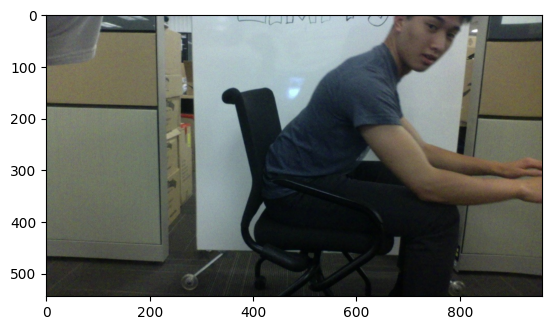

In [4]:
# A. IMAGE MANIPULATION with PIL - Python Image Library
# First of all, VIEWing an IMAGE
# - first import necessary libraries
import numpy as np
from PIL import Image
# - set a few generic variables
FilePath = 'dataset/bad/1/'
FileExt = '.jpg'
for FileName in range(146):
    ImageFile = FilePath + str(FileName) + FileExt
    # - open the imagefile
    img = Image.open(ImageFile)
    # - inspect necessary information
    print('Image format: ', img.format)
    print('Image mode: ', img.mode)
    # - display
    img.show()
    # A.1. CONVERT an IMAGE to NP ARRAY
    # - first import necessary libraries
    from numpy import asarray
    # - convert image format to numpy array
    data = asarray(img)
    # - inspect necessary information
    print('data type: ', type(data))
    print('data shape: ', data.shape)
    print(data)
    # A.2. CONVERT NP ARRAY back to IMAGE format
    # - convert numpy array to image format
    img_fromnparray = Image.fromarray(data)
    img_fromnparray.show()
    # - inspect necessary information
    print('Image size: ', img_fromnparray.size)
    print('Image format: ', img_fromnparray.format)
    print('Image mode: ', img_fromnparray.mode)
    # A.3. SAVE the IMAGE to ANOTHER FORMAT, e.g. PNG (source was JPG before)
    #  - 1st reopen image, and save is as PNG
    data = asarray(Image.open(ImageFile))
    print("Saving as PNG (RGB)...", FilePath + str(FileName))
    print(type(data), data.shape)
    img_png = Image.fromarray(data).save(FilePath + str(FileName) + '_pil-rgb' + '.png')
    #  - 2nd reopen image and convert it to grey, and save is as PNG
    data = asarray(Image.open(ImageFile).convert('L'))
    print("Saving as PNG (Grey)...", FilePath + str(FileName))
    print(type(data), data.shape)
    img_png = Image.fromarray(data).save(FilePath + str(FileName) + '_pil-grey' + '.png')
    # B. IMAGE MANIPULATION with Matplotlib
    # - first import necessary libraries
    from matplotlib import image, pyplot
    img = image.imread(ImageFile)
    # - inspect necessary information
    print('Image dtype: ', img.dtype)
    print('Image shape: ', img.shape)
    # - then show the image
    pyplot.imshow(img)
    # pyplot.show()
    #  - Image Enhancements with PIL: Contrast
    from PIL import ImageEnhance
    im = Image.open(ImageFile)
    enh = ImageEnhance.Contrast(im)
    enh.enhance(1.75).show("75% more contrast")
    #  - Image Enhancements with PIL: Brightness
    enh = ImageEnhance.Brightness(im)
    enh.enhance(1.5).show("50% more brightness")
    # C. IMAGE MANIPULATION with Keras (built on top of Tensorflow)
    # - first import necessary libraries
    from tensorflow.keras.utils import load_img
    import warnings
    # - load and view the image
    img = load_img(ImageFile)
    print('Image type:', type(img), ', image format:', img.format, ', image mode:', img.mode, ', image size:', img.size)
    img.show()
    from tensorflow.keras.utils import img_to_array, array_to_img
    print('Original type of image:', type(img))
    # - convert the image to numpy array
    img_nparray = img_to_array(img)
    print('Numpy array info:', type(img_nparray))
    print('type:', type(img_nparray.dtype))
    print('shape:', type(img_nparray.shape))
    from tensorflow.keras.utils import img_to_array, array_to_img
    print('Original type of image:', type(img))
    # - convert the image to numpy array
    img_nparray = img_to_array(img)
    print('Numpy array info:', type(img_nparray))
    print('type:', type(img_nparray.dtype))
    print('shape:', type(img_nparray.shape))
    from tensorflow.keras.utils import img_to_array, array_to_img
    print('Original type of image:', type(img))
    # - convert the image to numpy array
    img_nparray = img_to_array(img)
    print('Numpy array info:', type(img_nparray))
    print('type:', type(img_nparray.dtype))
    print('shape:', type(img_nparray.shape))
    print(img_nparray)
    img_pil = array_to_img(img_nparray)
    print("Converted (back) type of the image:", type(img_pil))
    # - saving an image with keras
    from tensorflow.keras.utils import load_img, save_img
    ImageFile = FilePath + str(FileName) + '_keras' + '.png'
    print("Saving Image File with Keras...", FilePath + str(FileName))
    save_img(ImageFile, img_nparray)
    # - loading an image with keras
    print("Loading Image File with Keras...", FilePath + str(FileName))
    img = load_img(ImageFile)
    print('Image type:', type(img), ', image format:', img.format, ', image mode:', img.mode, ', image size:', img.size)
    img.show()
    # *********************************
    # D. IMAGE MANIPULATION with OpenCV
    # *********************************
    # - first import necessary libraries
    # import cv2
    # - set ImageFile to our original image, then read the image
    ImageFile = FilePath + str(FileName) + FileExt
    im = cv2.imread(ImageFile)
    #cv2.imshow("my image", im)
    # - save the file as PNG before conversion (internally it's in BGR order)
    cv2.imwrite(FilePath + str(FileName) + '_opencvRGB' + '.png', im)
    print(type(img))
    # - convert to GRAY color space
    img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    # - save the file as PNG after conversion
    cv2.imwrite(FilePath + str(FileName) + '_opencvGREY' + '.png', img)
    # - convert to HSV color space (typical for object tracking)
    img = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    # - save the file as PNG after conversion
    cv2.imwrite(FilePath + str(FileName) + '_opencvHSV' + '.png', img)
    # - apply 50% blur
    #   alternatively we can use cv2.imshow() to display the image instead of writing it to a file
    #   e.g.:
    #     cv2.imshow("OpenCV: apply 50% blur", img)
    #     cv2.waitKey(0)
    img = cv2.medianBlur(im, 5)
    cv2.imwrite(FilePath + str(FileName) + '_opencvBLUR' + '.png', img)
    # - apply Edge Detection
    img = cv2.Canny(im, 100, 200)
    cv2.imwrite(FilePath + str(FileName) + '_opencvEdgeDetect' + '.png', img)

In [27]:
# A.1. CONVERT an IMAGE to NP ARRAY
# - first import necessary libraries
from numpy import asarray
# - convert image format to numpy array
data = asarray(img)
# - inspect necessary information
print('data type: ', type(data))
print('data shape: ', data.shape)

data type:  <class 'numpy.ndarray'>
data shape:  (544, 960, 3)


In [28]:
print(data)

[[[ 3  1  4]
  [ 2  0  3]
  [ 1  0  2]
  ...
  [ 0 14  0]
  [ 0 12  0]
  [ 0 11  0]]

 [[ 3  1  4]
  [ 2  0  3]
  [ 1  0  2]
  ...
  [ 1 15  0]
  [ 1 13  1]
  [ 0 12  0]]

 [[ 3  1  4]
  [ 2  0  3]
  [ 1  0  2]
  ...
  [ 1 15  0]
  [ 1 13  1]
  [ 0 12  0]]

 ...

 [[ 3  1  4]
  [ 2  0  3]
  [ 1  0  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  1  4]
  [ 2  0  3]
  [ 1  0  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  1  4]
  [ 2  0  3]
  [ 1  0  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


In [29]:
# A.2. CONVERT NP ARRAY back to IMAGE format
# - convert numpy array to image format
img_fromnparray = Image.fromarray(data)
img_fromnparray.show()
# - inspect necessary information
print('Image size: ', img_fromnparray.size)
print('Image format: ', img_fromnparray.format)
print('Image mode: ', img_fromnparray.mode)

Image size:  (960, 544)
Image format:  None
Image mode:  RGB


In [30]:
# A.3. SAVE the IMAGE to ANOTHER FORMAT, e.g. PNG (source was JPG before)
#  - 1st reopen image, and save is as PNG
data = asarray(Image.open(ImageFile))
print("Saving as PNG (RGB)...", FilePath + str(FileName))
print(type(data), data.shape)
img_png = Image.fromarray(data).save(FilePath + str(FileName) + '_pil-rgb' + '.png')
#  - 2nd reopen image and convert it to grey, and save is as PNG
data = asarray(Image.open(ImageFile).convert('L'))
print("Saving as PNG (Grey)...", FilePath + str(FileName))
print(type(data), data.shape)
img_png = Image.fromarray(data).save(FilePath + str(FileName) + '_pil-grey' + '.png')

Saving as PNG (RGB)... dataset/good/processed 10
<class 'numpy.ndarray'> (544, 960, 3)
Saving as PNG (Grey)... dataset/good/processed 10
<class 'numpy.ndarray'> (544, 960)


Image dtype:  uint8
Image shape:  (544, 960, 3)


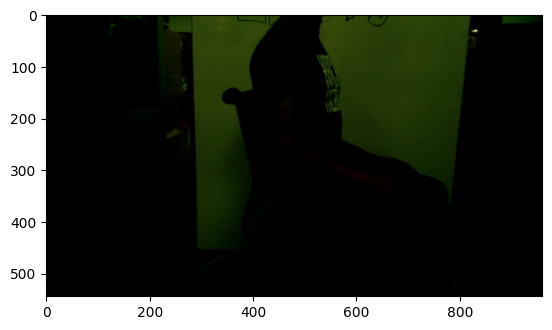

In [31]:
# B. IMAGE MANIPULATION with Matplotlib
# - first import necessary libraries
from matplotlib import image, pyplot
img = image.imread(ImageFile)
# - inspect necessary information
print('Image dtype: ', img.dtype)
print('Image shape: ', img.shape)
# - then show the image
pyplot.imshow(img)
# pyplot.show()

In [32]:
# A.4 Continuing IMAGE MANIPULATION with PIL
#     Rotate, Crop, Contrast & Brightness
#  - Image rotation with PIL
Rotation_Degree = 30
im = Image.open(ImageFile)
im.rotate(Rotation_Degree).show()
#  - Image crop with PIL
#    Looking at the pixel locations in above image, we can define the coordinate (box) to crop
box = (350, 100, 500, 200) #left, upper, right, lower
im.crop(box).show()

In [33]:
#  - Image Enhancements with PIL: Contrast
from PIL import ImageEnhance
im = Image.open(ImageFile)
enh = ImageEnhance.Contrast(im)
enh.enhance(1.75).show("75% more contrast")
#  - Image Enhancements with PIL: Brightness
enh = ImageEnhance.Brightness(im)
enh.enhance(1.5).show("50% more brightness")

In [34]:
# C. IMAGE MANIPULATION with Keras (built on top of Tensorflow)
# - first import necessary libraries
from tensorflow.keras.utils import load_img
import warnings
# - load and view the image
img = load_img(ImageFile)
print('Image type:', type(img), ', image format:', img.format, ', image mode:', img.mode, ', image size:', img.size)
img.show()

Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'> , image format: JPEG , image mode: RGB , image size: (960, 544)


In [35]:
from tensorflow.keras.utils import img_to_array, array_to_img
print('Original type of image:', type(img))
# - convert the image to numpy array
img_nparray = img_to_array(img)
print('Numpy array info:', type(img_nparray))
print('type:', type(img_nparray.dtype))
print('shape:', type(img_nparray.shape))

Original type of image: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Numpy array info: <class 'numpy.ndarray'>
type: <class 'numpy.dtype[float32]'>
shape: <class 'tuple'>


In [36]:
print(img_nparray)

[[[ 3.  1.  4.]
  [ 2.  0.  3.]
  [ 1.  0.  2.]
  ...
  [ 0. 14.  0.]
  [ 0. 12.  0.]
  [ 0. 11.  0.]]

 [[ 3.  1.  4.]
  [ 2.  0.  3.]
  [ 1.  0.  2.]
  ...
  [ 1. 15.  0.]
  [ 1. 13.  1.]
  [ 0. 12.  0.]]

 [[ 3.  1.  4.]
  [ 2.  0.  3.]
  [ 1.  0.  2.]
  ...
  [ 1. 15.  0.]
  [ 1. 13.  1.]
  [ 0. 12.  0.]]

 ...

 [[ 3.  1.  4.]
  [ 2.  0.  3.]
  [ 1.  0.  2.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 3.  1.  4.]
  [ 2.  0.  3.]
  [ 1.  0.  2.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 3.  1.  4.]
  [ 2.  0.  3.]
  [ 1.  0.  2.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [37]:
img_pil = array_to_img(img_nparray)
print("Converted (back) type of the image:", type(img_pil))
# - saving an image with keras
from tensorflow.keras.utils import load_img, save_img
ImageFile = FilePath + str(FileName) + '_keras' + '.png'
print("Saving Image File with Keras...", FilePath + str(FileName))
save_img(ImageFile, img_nparray)
# - loading an image with keras
print("Loading Image File with Keras...", FilePath + str(FileName))
img = load_img(ImageFile)
print('Image type:', type(img), ', image format:', img.format, ', image mode:', img.mode, ', image size:', img.size)
img.show()

Converted (back) type of the image: <class 'PIL.Image.Image'>
Saving Image File with Keras... dataset/good/1/0
Loading Image File with Keras... dataset/good/1/0
Image type: <class 'PIL.PngImagePlugin.PngImageFile'> , image format: PNG , image mode: RGB , image size: (960, 544)


In [38]:
# *********************************
# D. IMAGE MANIPULATION with OpenCV
# *********************************
# - first import necessary libraries
# import cv2
# - set ImageFile to our original image, then read the image
ImageFile = FilePath + str(FileName) + FileExt
im = cv2.imread(ImageFile)
#cv2.imshow("my image", im)
# - save the file as PNG before conversion (internally it's in BGR order)
cv2.imwrite(FilePath + str(FileName) + '_opencvRGB' + '.png', im)
print(type(img))
# - convert to GRAY color space
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# - save the file as PNG after conversion
cv2.imwrite(FilePath + str(FileName) + '_opencvGREY' + '.png', img)
# - convert to HSV color space (typical for object tracking)
img = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
# - save the file as PNG after conversion
cv2.imwrite(FilePath + str(FileName) + '_opencvHSV' + '.png', img)

<class 'PIL.PngImagePlugin.PngImageFile'>


True

In [39]:
# - apply 50% blur
#   alternatively we can use cv2.imshow() to display the image instead of writing it to a file
#   e.g.:
#     cv2.imshow("OpenCV: apply 50% blur", img)
#     cv2.waitKey(0)
img = cv2.medianBlur(im, 5)
cv2.imwrite(FilePath + str(FileName) + '_opencvBLUR' + '.png', img)
# - apply Edge Detection
img = cv2.Canny(im, 100, 200)
cv2.imwrite(FilePath + str(FileName) + '_opencvEdgeDetect' + '.png', img)

True